# A Real Dataset

# Getting the dataset ready

## Downloading

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2
from config import *

In [2]:
# Download the data 
if not mnist_name in os.listdir(DATASETS_DIR):

    import urllib
    import urllib.request

    file_name = f'{DATASETS_DIR.joinpath(f"{mnist_name}.zip")}'
    
    # Dowloading
    print(f'Downloading as {DATASETS_DIR.joinpath(mnist_name)}.zip from {mnist_url}....')
    urllib.request.urlretrieve(mnist_url, file_name, )
    print('Successfully Downloaded')

    #Unzip zip file
    from zipfile import ZipFile

    print(f'Unzipping {mnist_name}.zip....')
    with ZipFile(file_name) as files:
        files.extractall(DATASETS_DIR.joinpath(mnist_name))
    print('Successfully Unzipped')

    # delete zip file
    print('Deleting zip file....')
    os.remove(file_name)
    print('Done')
else:
    print('Folder already in', DATASETS_DIR)

Folder already in c:\Users\ydine\Documents\numpyml\nnfs\datasets


## Loading the data to memory

In [3]:
data = {}

for st in os.listdir(DATASETS_DIR.joinpath(mnist_name))[1:]:
    data[st] = {
        'labels' : [],
        'images' : []
    }
    for label in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st)):
        for image in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label)):
            data[st]['labels'].append(label)
            data[st]['images'].append(cv2.imread(
                DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label).joinpath(image),
                cv2.IMREAD_UNCHANGED
                ))
    data[st]['labels'] = np.array(data[st]['labels']).astype(np.uint8)
    data[st]['images'] = np.array(data[st]['images'])

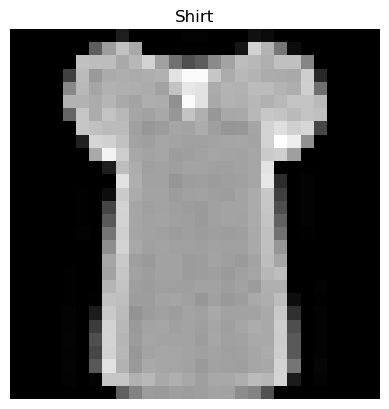

In [4]:
img = np.random.randint(0,len(data['train']['labels']))

plt.figure()
plt.title(mnist_labels[int(data['train']['labels'][img])])
plt.imshow(data['train']['images'][img], cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Splitting the data

In [5]:
X_train, y_train, X_test, y_test = data['train']['images'],data['train']['labels'],data['test']['images'],data['test']['labels']

## Rescaling the data

In [6]:
X_train = (X_train.astype(np.float32)/127.5) - 1
X_test = (X_test.astype(np.float32)/127.5) - 1

In [7]:
X_train.dtype

dtype('float32')

In [8]:
X_train.min(), X_train.max()

(-1.0, 1.0)

## Flattening the data to fit out Dense network

In [9]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

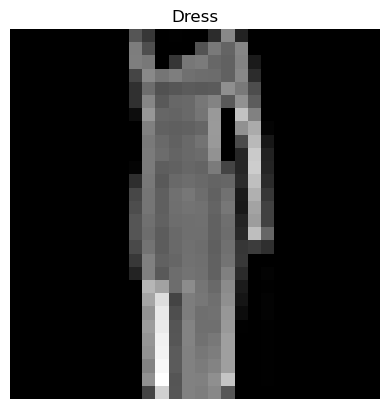

In [10]:
img = np.random.randint(0,60000)


plt.figure()
plt.title(mnist_labels[int(y_train[img])])
plt.imshow(X_train[img].reshape(28,28), cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Data Shuffling

In [11]:
keys = np.arange(X_train.shape[0])
np.random.shuffle(keys)

In [12]:
X_train_shuffled = X_train[keys]
y_train_shuffled = y_train[keys]

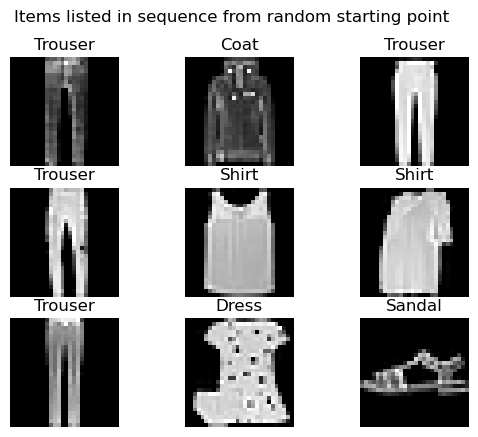

In [13]:
i = np.random.randint(0,60000)

fig, ax = plt.subplots(3,3)
fig.suptitle('Items listed in sequence from random starting point', ha='center')
for img in range(i,i+9):
    ax[(img-i)//3,(img-i)%3].set_title(mnist_labels[int(y_train_shuffled[img])])
    ax[(img-i)//3,(img-i)%3].imshow(X_train_shuffled[img].reshape(28,28), cmap=plt.cm.gray)
    ax[(img-i)//3,(img-i)%3].axis(False)
plt.show()

# Modelling

In [14]:
# import the api
import NN

## Create the model

In [15]:
model = NN.Model()
model.add(NN.Dense_Layer(X_train.shape[1], 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 10))
model.add(NN.Softmax_Activation())

model.compile(
    optimizer=NN.Adam(decay=5e-5),
    loss=NN.CategoricalCrossentropy(),
    accuracy=NN.Classification_Accuracy()
)

In [16]:
history = model.fit(
    X_train_shuffled,
    y_train_shuffled,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=128
    )

--------------------------------------------------------------------------------------------------------------------------
Epoch : 1 Learning_rate : 0.001


Accuracy : 0.7301166666666666 Loss : 0.7408575978608638: 100%|██████████| 469/469 [00:01<00:00, 276.54it/s]
Validation Accuracy : 0.8041 Validation Loss : 0.539838837607704: 100%|██████████| 79/79 [00:00<00:00, 803.07it/s]    


Training Accuracy : 0.7301166666666666 Training Loss 0.7408575978608638 Training Data Loss : 0.7408575978608638 Regularization Loss: 0
Validation Accuracy : 0.8041 Validation Loss : 0.539838837607704
--------------------------------------------------------------------------------------------------------------------------
Epoch : 2 Learning_rate : 0.0009771350400625365


Accuracy : 0.8349 Loss : 0.46293136502059: 100%|██████████| 469/469 [00:01<00:00, 325.99it/s]               
Validation Accuracy : 0.8313 Validation Loss : 0.4696626845181748: 100%|██████████| 79/79 [00:00<00:00, 798.09it/s]   


Training Accuracy : 0.8349 Training Loss 0.46293136502059 Training Data Loss : 0.46293136502059 Regularization Loss: 0
Validation Accuracy : 0.8313 Validation Loss : 0.4696626845181748
--------------------------------------------------------------------------------------------------------------------------
Epoch : 3 Learning_rate : 0.0009552466924583273


Accuracy : 0.8516666666666667 Loss : 0.4107793480325383: 100%|██████████| 469/469 [00:01<00:00, 330.85it/s] 
Validation Accuracy : 0.8445 Validation Loss : 0.43569595039348735: 100%|██████████| 79/79 [00:00<00:00, 612.39it/s]            


Training Accuracy : 0.8516666666666667 Training Loss 0.4107793480325383 Training Data Loss : 0.4107793480325383 Regularization Loss: 0
Validation Accuracy : 0.8445 Validation Loss : 0.43569595039348735
--------------------------------------------------------------------------------------------------------------------------
Epoch : 4 Learning_rate : 0.000934317481080071


Accuracy : 0.8608 Loss : 0.38232973203281095: 100%|██████████| 469/469 [00:01<00:00, 322.48it/s]            
Validation Accuracy : 0.8501 Validation Loss : 0.41863005798417263: 100%|██████████| 79/79 [00:00<00:00, 811.21it/s]  


Training Accuracy : 0.8608 Training Loss 0.38232973203281095 Training Data Loss : 0.38232973203281095 Regularization Loss: 0
Validation Accuracy : 0.8501 Validation Loss : 0.41863005798417263
--------------------------------------------------------------------------------------------------------------------------
Epoch : 5 Learning_rate : 0.0009142857142857143


Accuracy : 0.8684166666666666 Loss : 0.3622168564732666: 100%|██████████| 469/469 [00:01<00:00, 331.74it/s] 
Validation Accuracy : 0.8554 Validation Loss : 0.4062747104430894: 100%|██████████| 79/79 [00:00<00:00, 752.37it/s]            

Training Accuracy : 0.8684166666666666 Training Loss 0.3622168564732666 Training Data Loss : 0.3622168564732666 Regularization Loss: 0
Validation Accuracy : 0.8554 Validation Loss : 0.4062747104430894


In [17]:
def plot_history(history):
    import pandas as pd
    hd = pd.DataFrame(history)

    fig,axx = plt.subplots(2,2,figsize=(10,7))
    fig.suptitle('Training History data')
    gs = axx[1,0].get_gridspec()
    axx[0,0].set_title('Accuracies')
    hd[['accuracies', 'val_accuracies']].plot(ax=axx[0,0])
    axx[0,1].set_title('Losses')
    hd[['losses', 'val_losses']].plot(ax=axx[0,1])
    axx[1,0].remove()
    axx[1,1].remove()
    bigax = fig.add_subplot(gs[1,:])
    bigax.set_title('Learning Rate Curve')
    hd['learning_rates'].plot(c='g', ax=bigax)
    plt.legend()
    plt.show()

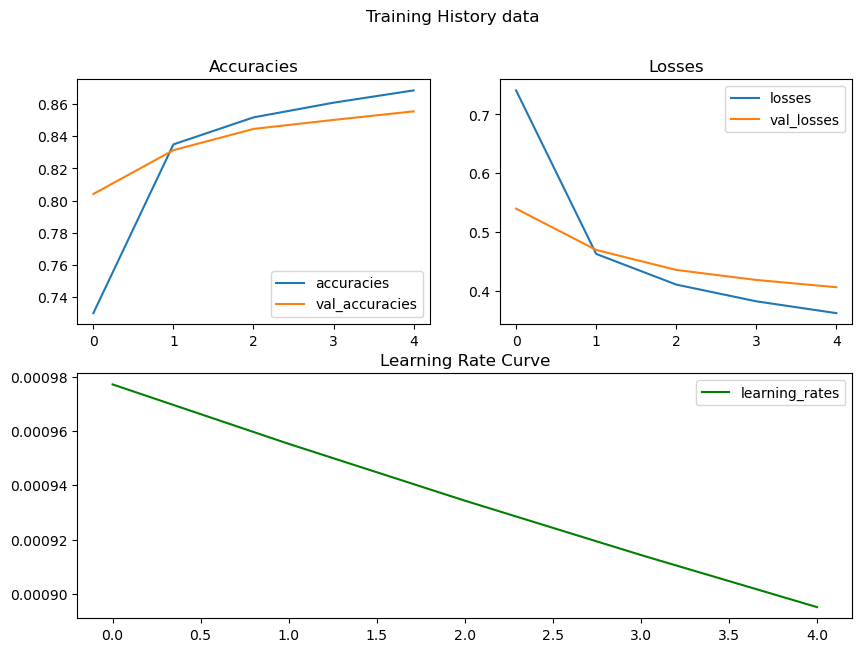

In [18]:
plot_history(history)

## Importance of shuffling

--------------------------------------------------------------------------------------------------------------------------
Epoch : 1 Learning_rate : 0.001


Accuracy : 0.33858333333333335 Loss : 2.317948143763337: 100%|██████████| 469/469 [00:01<00:00, 297.58it/s] 
Validation Accuracy : 0.1002 Validation Loss : 3.6790453342946217: 100%|██████████| 79/79 [00:00<00:00, 738.32it/s]             


Training Accuracy : 0.33858333333333335 Training Loss 2.317948143763337 Training Data Loss : 2.317948143763337 Regularization Loss: 0
Validation Accuracy : 0.1002 Validation Loss : 3.6790453342946217
--------------------------------------------------------------------------------------------------------------------------
Epoch : 2 Learning_rate : 0.0009771350400625365


Accuracy : 0.4279 Loss : 1.9011412307251456: 100%|██████████| 469/469 [00:01<00:00, 317.49it/s]             
Validation Accuracy : 0.1 Validation Loss : 4.389343251074168: 100%|██████████| 79/79 [00:00<00:00, 771.19it/s]               


Training Accuracy : 0.4279 Training Loss 1.9011412307251456 Training Data Loss : 1.9011412307251456 Regularization Loss: 0
Validation Accuracy : 0.1 Validation Loss : 4.389343251074168
--------------------------------------------------------------------------------------------------------------------------
Epoch : 3 Learning_rate : 0.0009552466924583273


Accuracy : 0.5949333333333333 Loss : 1.5207605721043784: 100%|██████████| 469/469 [00:01<00:00, 302.54it/s]
Validation Accuracy : 0.1007 Validation Loss : 5.402980798941659: 100%|██████████| 79/79 [00:00<00:00, 767.02it/s]            


Training Accuracy : 0.5949333333333333 Training Loss 1.5207605721043784 Training Data Loss : 1.5207605721043784 Regularization Loss: 0
Validation Accuracy : 0.1007 Validation Loss : 5.402980798941659
--------------------------------------------------------------------------------------------------------------------------
Epoch : 4 Learning_rate : 0.000934317481080071


Accuracy : 0.7438166666666667 Loss : 1.0545995222048667: 100%|██████████| 469/469 [00:01<00:00, 309.45it/s]
Validation Accuracy : 0.1075 Validation Loss : 5.662765696290169: 100%|██████████| 79/79 [00:00<00:00, 726.34it/s]             


Training Accuracy : 0.7438166666666667 Training Loss 1.0545995222048667 Training Data Loss : 1.0545995222048667 Regularization Loss: 0
Validation Accuracy : 0.1075 Validation Loss : 5.662765696290169
--------------------------------------------------------------------------------------------------------------------------
Epoch : 5 Learning_rate : 0.0009142857142857143


Accuracy : 0.76965 Loss : 0.9179036523133794: 100%|██████████| 469/469 [00:01<00:00, 316.47it/s]           
Validation Accuracy : 0.13 Validation Loss : 5.57544687953299: 100%|██████████| 79/79 [00:00<00:00, 734.52it/s]                


Training Accuracy : 0.76965 Training Loss 0.9179036523133794 Training Data Loss : 0.9179036523133794 Regularization Loss: 0
Validation Accuracy : 0.13 Validation Loss : 5.57544687953299


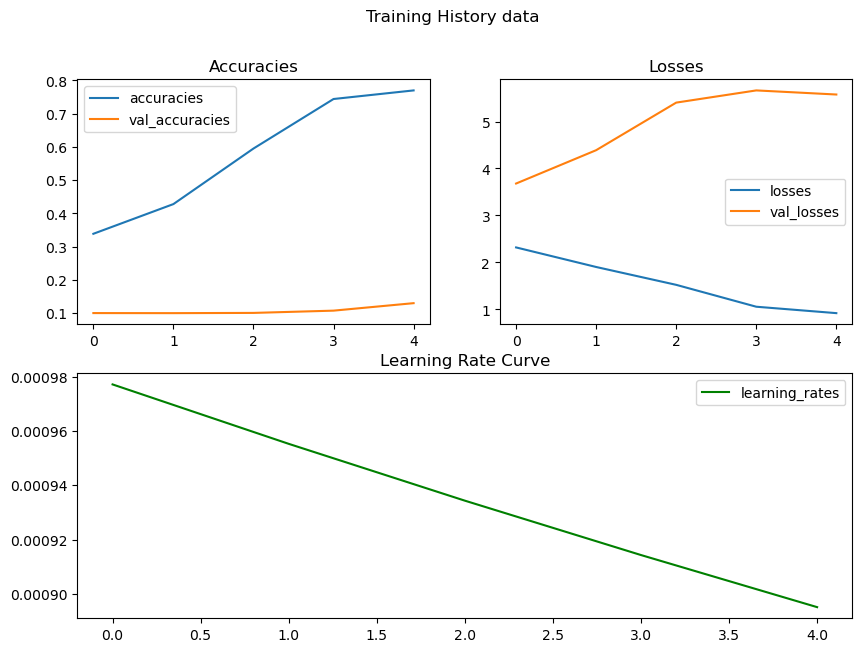

In [19]:
model = NN.Model()
model.add(NN.Dense_Layer(X_train.shape[1], 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 10))
model.add(NN.Softmax_Activation())

model.compile(
    optimizer=NN.Adam(decay=5e-5),
    loss=NN.CategoricalCrossentropy(),
    accuracy=NN.Classification_Accuracy()
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=128
    )

plot_history(history)